# Reading Data

In [371]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [372]:
df=pd.read_csv('sondos khaled - full_gen_data.csv')

In [373]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

In [375]:
#check for null values
df['sizes'].isnull().sum()

0

In [376]:
#remove duplicates
df=df.drop_duplicates() 
df.shape

(100000, 24)

## Data Transformation 

In [377]:
import webcolors #to convert rgb to colors

In [378]:
#combine rgp columns into main color and secodary color columns
df['main_color'] = df[['rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col']].values.tolist()
df['sec_color'] = df[['rgb_r_sec_col', 'rgb_g_sec_col', 'rgb_b_sec_col']].values.tolist()
df=df.drop(columns=['rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col','rgb_r_sec_col', 'rgb_g_sec_col', 'rgb_b_sec_col'],axis=1)
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,label,main_color,sec_color
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,0,"[205, 104, 57]","[255, 187, 255]"
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,0,"[188, 238, 104]","[255, 187, 255]"
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,0,"[205, 173, 0]","[255, 187, 255]"
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,0,"[205, 140, 149]","[164, 211, 238]"
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,0,"[138, 43, 226]","[164, 211, 238]"


In [379]:
#function to convert rgb values to color name

def get_colour_name(rgb_triplet):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb_triplet[0]) ** 2
        gd = (g_c - rgb_triplet[1]) ** 2
        bd = (b_c - rgb_triplet[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]



In [380]:
#convert rgb values in main and secondary columns to their corresponding color names
df['main_color']=df['main_color'].apply(get_colour_name)
df['sec_color']=df['sec_color'].apply(get_colour_name)



In [381]:
#create column retail month from retail week

df['retailmonth']=df['retailweek'].apply(lambda x: x[:7])

In [382]:
#create column retail year from retail week

df['retailyear']=df['retailweek'].apply(lambda x: x[:4])

In [383]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,category,cost,style,sizes,gender,label,main_color,sec_color,retailmonth,retailyear
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,0,chocolate,lavender,2016-03,2016
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,0,darkkhaki,lavender,2016-03,2016
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,0,goldenrod,lavender,2016-03,2016
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,0,rosybrown,lightblue,2016-03,2016
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,0,blueviolet,lightblue,2016-03,2016


# Data Visualization

In [384]:
import matplotlib.pyplot as plt 
import seaborn as sns


In [385]:
#function to plot columns
def plot(group,column,plot,title=""):
    ax=plt.figure(figsize=(12,5))
    plt.title(title)
    plt.ylabel('regular price')
    df.groupby(group)[column].sum().sort_values().plot(kind=plot)

## product group insights

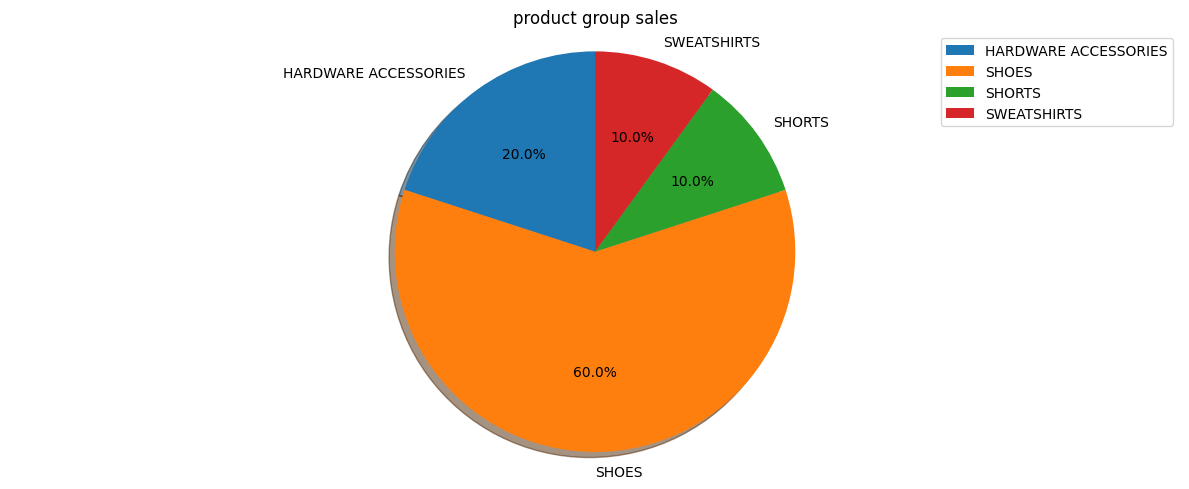

In [386]:
fig1, ax1 = plt.subplots(figsize=(12,5))
plt.pie(df.groupby('productgroup')['sales'].sum(),labels=df.groupby('productgroup')['sales'].sum().index, autopct='%1.1f%%',
        shadow=True, startangle=90) 
plt.title('product group sales')
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

<AxesSubplot: xlabel='productgroup', ylabel='count'>

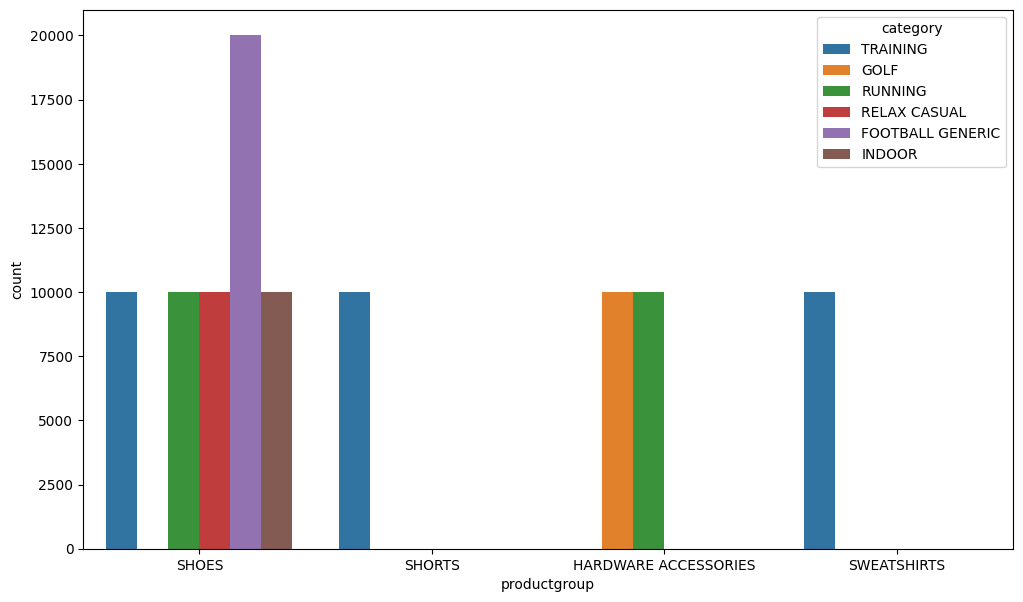

In [387]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(data=df,x='productgroup',hue='category')

#### insights:
##### 1-Shoes has the highest sales rate among all products.  

##### 2-Football generic is the dominant category in shoes products.

##### 3-All categories except for football have the same ratio in shoes products.

##### 4-Training is the only category in both shorts and sweatshirts products.

##### 5-Golf category only exists in the hardware accessories products.

##### 6-Running category only exists in hardware accessories  and shoes products.

## Category insights

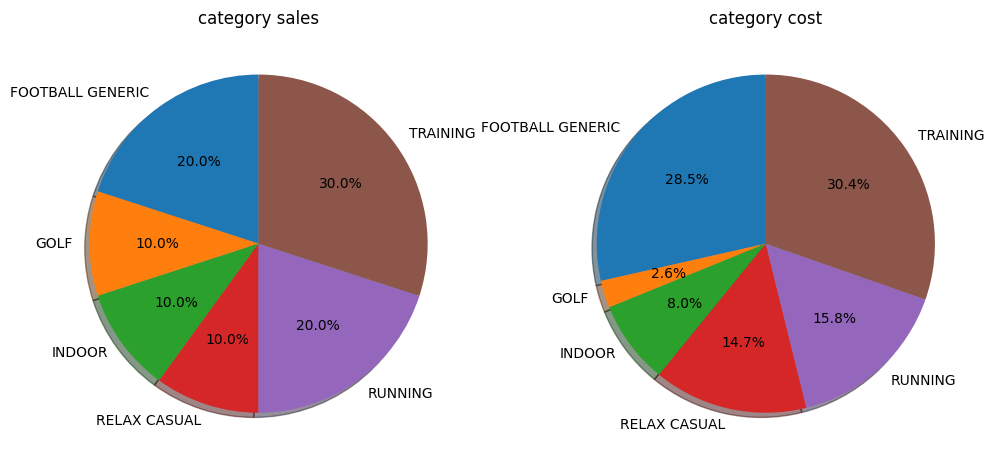

In [389]:
fig, ax = plt.subplots(2,1,figsize=(12,7))
plt.subplot(1,2,1)
plt.pie(df.groupby('category')['sales'].sum(),labels=df.groupby('category')['sales'].sum().index, autopct='%1.1f%%',
        shadow=True, startangle=90) 
plt.title('category sales')

plt.subplot(1,2,2)
plt.pie(df.groupby('category')['cost'].sum(),labels=df.groupby('category')['cost'].sum().index, autopct='%1.1f%%',
        shadow=True, startangle=90) 
plt.title('category cost')

plt.show()

#### insights:
##### 1-Training catogry has the highest purchase rate among all catogries.
##### 2-Golf, Relax Casual, and Indoor categories have the lowest purchase rate.
##### 3-Training and football categories have the highest cost .
##### 4-Golf category has the lowest cost. 


## Gender insights

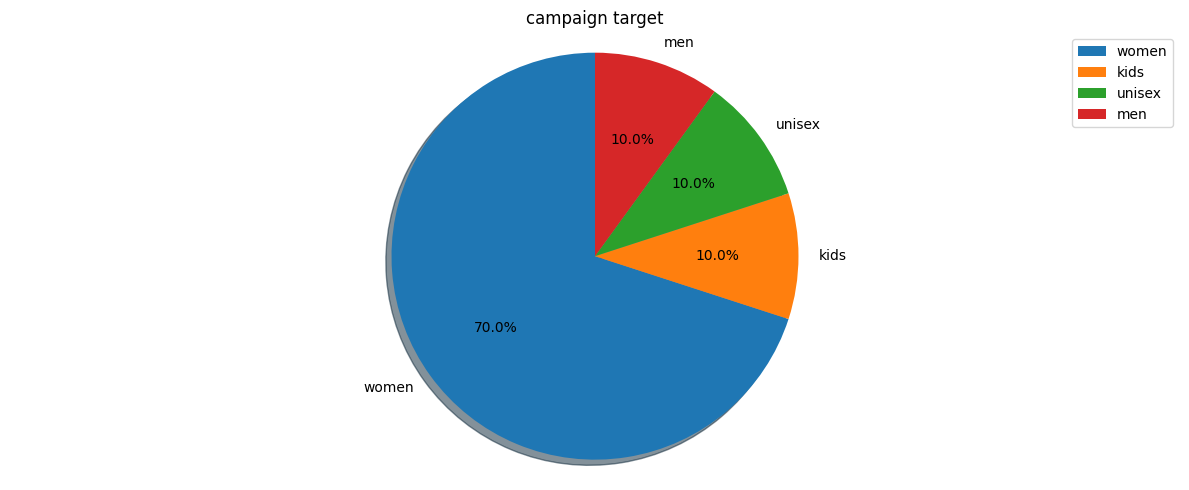

In [390]:

fig1, ax1 = plt.subplots(figsize=(12,5))
ax1.pie(df['gender'].value_counts(),labels=df['gender'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('campaign target')
plt.tight_layout()
plt.legend()
plt.show()

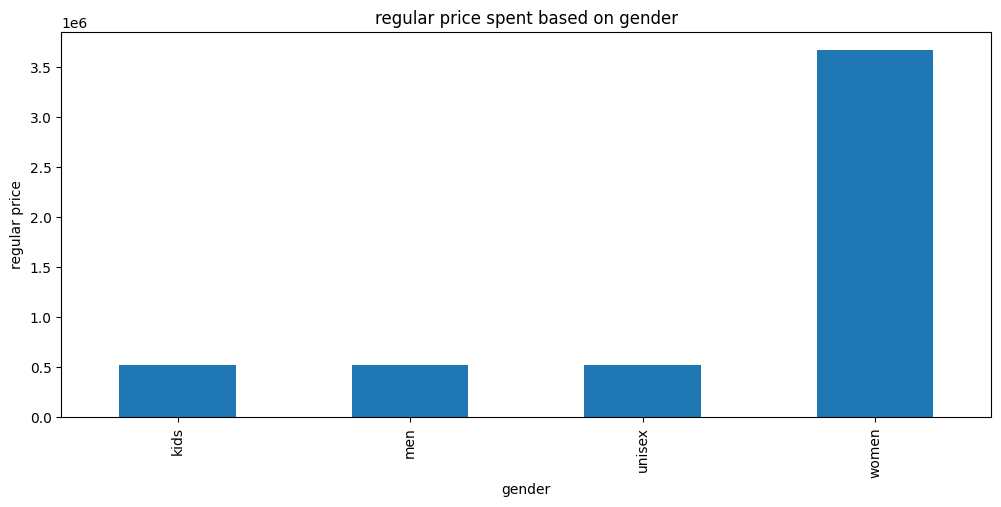

In [391]:
plot('gender','regular_price','bar','regular price spent based on gender')

#### insights:
#### women are the most targeted gender of the campaign 
##### Women's purchasing power is greater than the rest of the genders purchasing power
##### About 70% of the customers have made sales of women
##### Women have made sales worth more than 3 million 
##### kids, men and unisex have the same ratio of beign a target and the same purchase rate

## Country insights

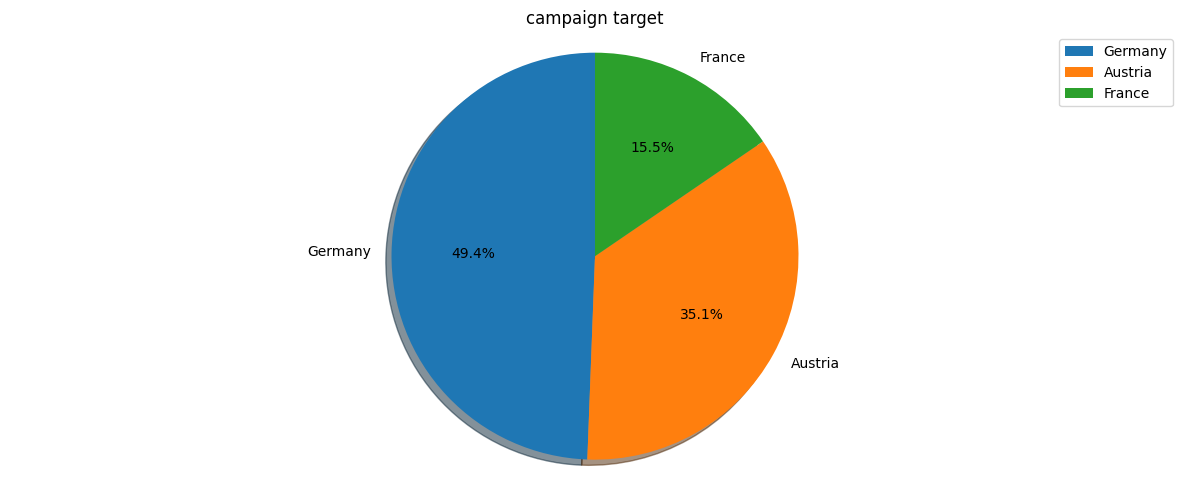

In [392]:

fig1, ax1 = plt.subplots(figsize=(12,5))
ax1.pie(df['country'].value_counts(), labels=df['country'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('campaign target')
plt.tight_layout()
plt.legend()
plt.show()

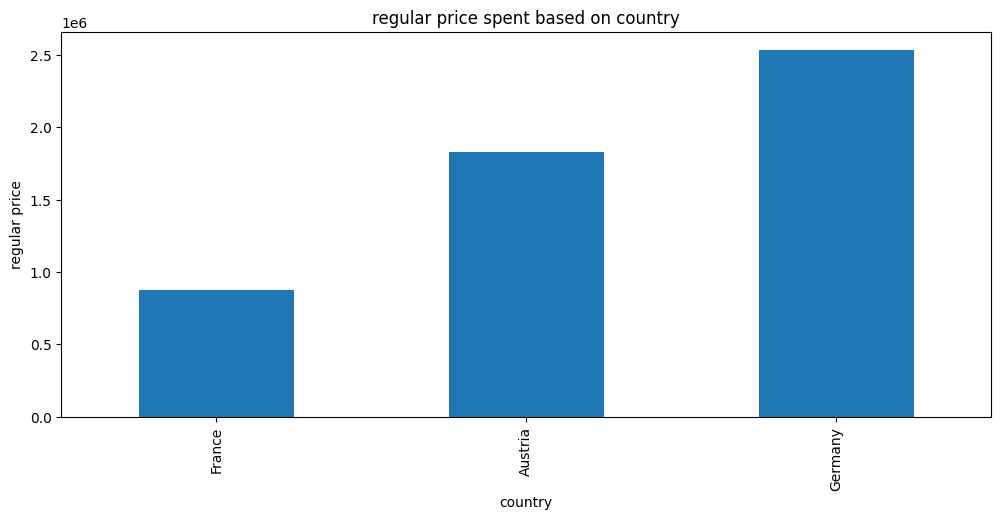

In [393]:
plot('country','regular_price','bar',title="regular price spent based on country")

<AxesSubplot: title={'center': 'categories in each country'}, xlabel='country', ylabel='count'>

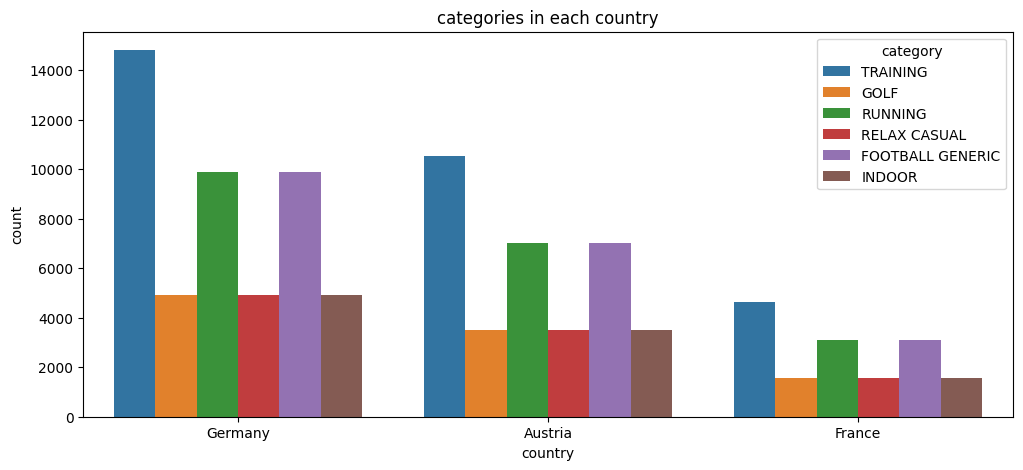

In [394]:
fig1, ax1 = plt.subplots(figsize=(12,5))
plt.title('categories in each country')
sns.countplot(data=df,x='country',hue='category')


#### insights:
##### 1-Germany has the highest purchase rate among all countries.
##### 2-France has the lowest purchase rate.
##### 3-Categories has the same distrbution among all countries.
##### 4-All countries are more interested in the Training category compared to other categories. 


## Sizes insights

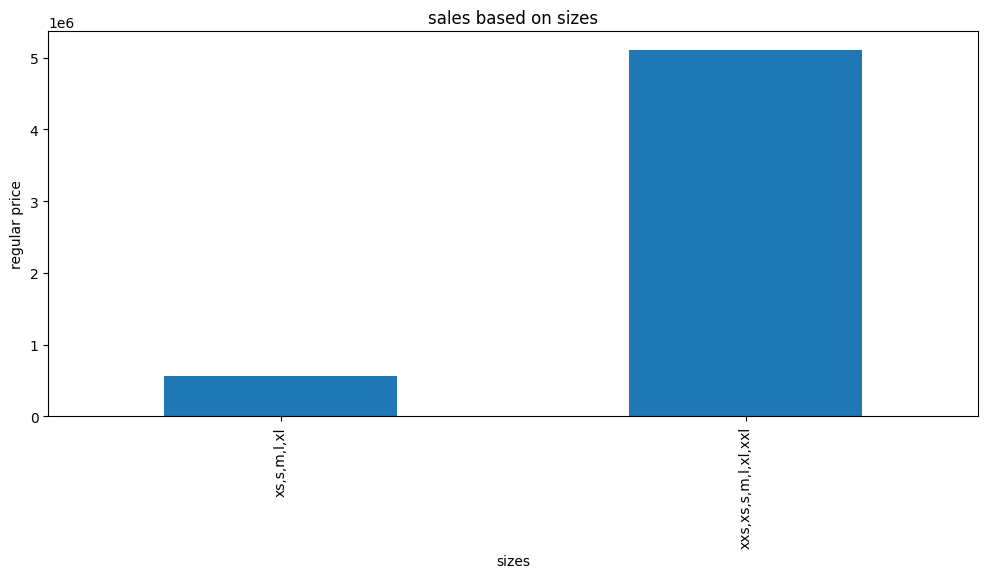

In [395]:
plot('sizes','sales','bar','sales based on sizes')

#### insights:
##### 1-the variety of sizes affects the  purchase rate 
##### 2-there's a positive corelation between the variety of sizes and the sales rate 


## Main Colors insights

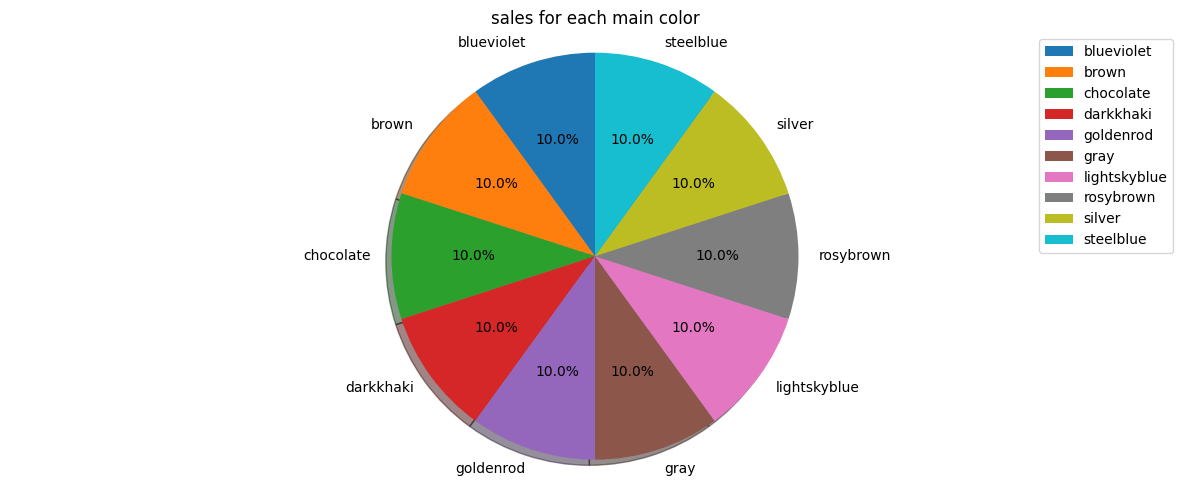

In [396]:
fig1, ax1 = plt.subplots(figsize=(12,5))

ax1.pie(df.groupby('main_color')['sales'].sum(),labels=df.groupby('main_color')['sales'].sum().index, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('sales for each main color')
plt.tight_layout()
plt.legend()
plt.show()

<AxesSubplot: title={'center': 'main colors in each country'}, xlabel='main_color', ylabel='count'>

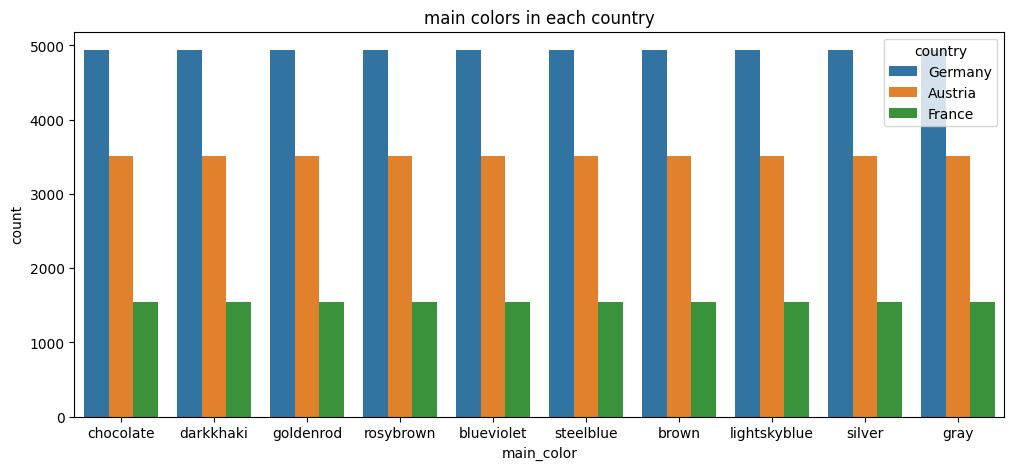

In [397]:
fig1, ax1 = plt.subplots(figsize=(12,5))
plt.title('main colors in each country')
sns.countplot(data=df,x='main_color',hue='country')

#### insights:
##### 1-All main colors have the same purchase rate
#### 1-All main colors are distrbuted equally among the three countries in the campaign

## Secondary Colors insights

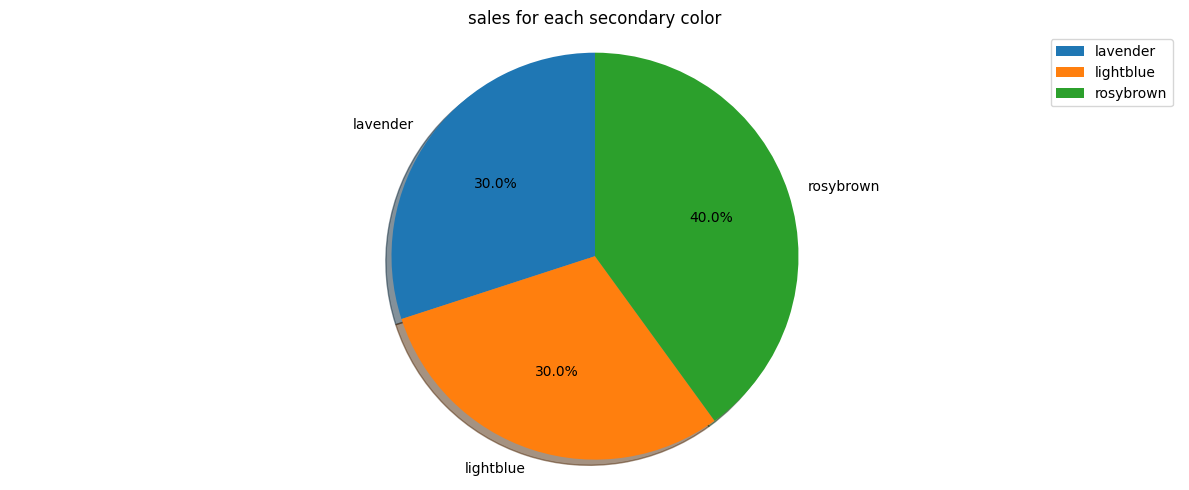

In [398]:
fig1, ax1 = plt.subplots(figsize=(12,5))

ax1.pie(df.groupby('sec_color')['sales'].sum(),labels=df.groupby('sec_color')['sales'].sum().index, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.title('sales for each secondary color')
plt.tight_layout()
plt.legend()
plt.show()

<AxesSubplot: title={'center': 'secondary colors in each country'}, xlabel='sec_color', ylabel='count'>

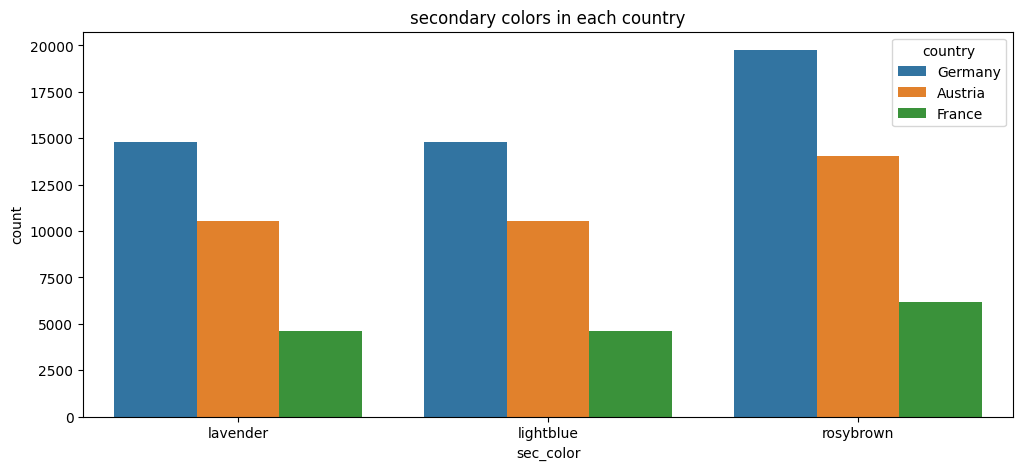

In [399]:
fig1, ax1 = plt.subplots(figsize=(12,5))
plt.title('secondary colors in each country')

sns.countplot(data=df,x='sec_color',hue='country')

#### insights:
##### 1-Rosybrown as a secondary color has the highest purchase rate.
##### 2-Lavender and Lightblue share a slightly higher purchase rate than Rosybrown.

#### 3-Lavender and Lightblue has an identical distribution among the three countries.

## Style insights

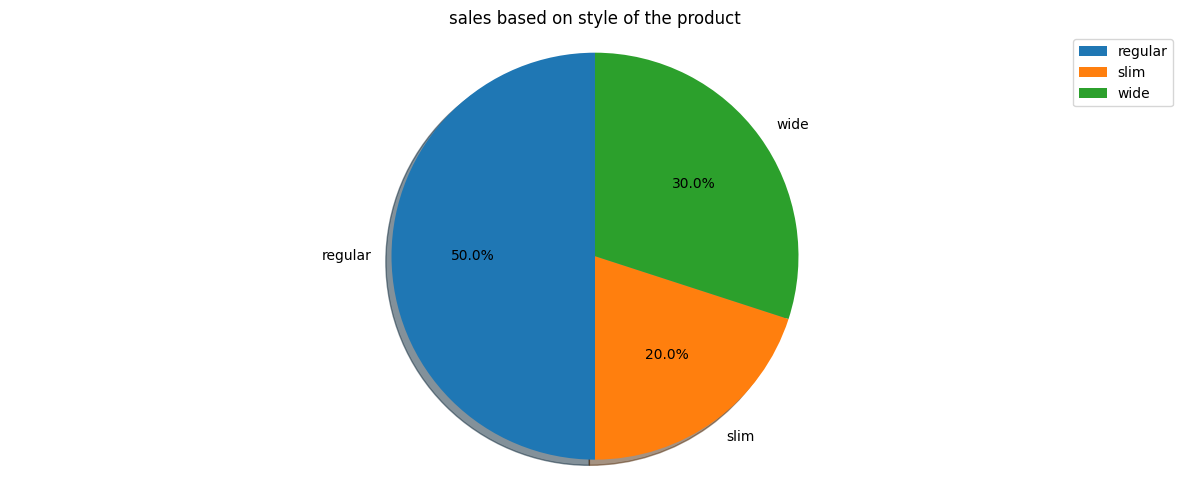

In [400]:
fig1, ax1 = plt.subplots(figsize=(12,5))

ax1.pie(df.groupby('style')['sales'].sum(),labels=df.groupby('style')['sales'].sum().index, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.title('sales based on style of the product')
plt.tight_layout()
plt.legend()
plt.show()

<AxesSubplot: title={'center': 'style based on gender'}, xlabel='style', ylabel='count'>

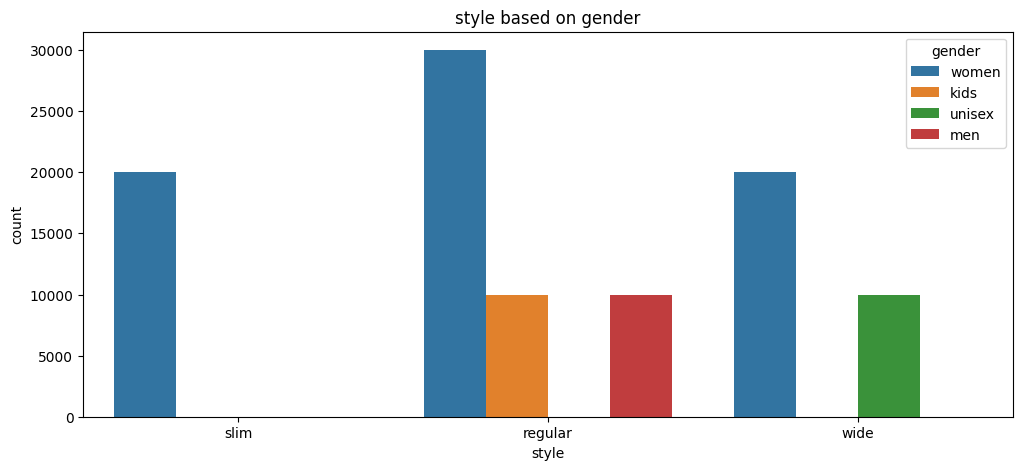

In [401]:
fig1, ax1 = plt.subplots(figsize=(12,5))
plt.title('style based on gender')
sns.countplot(data=df,x='style',hue='gender')

#### insights:
##### 1-Regular style has the highest purchase rate 
##### 2-unisex group only interested in wide style
##### 3- men and kids are only interested in regular style
##### 4- women is the only interested gender in slim style 
##### 5- women show interset in every style specially the regular one.



## Retail week,month and year insights

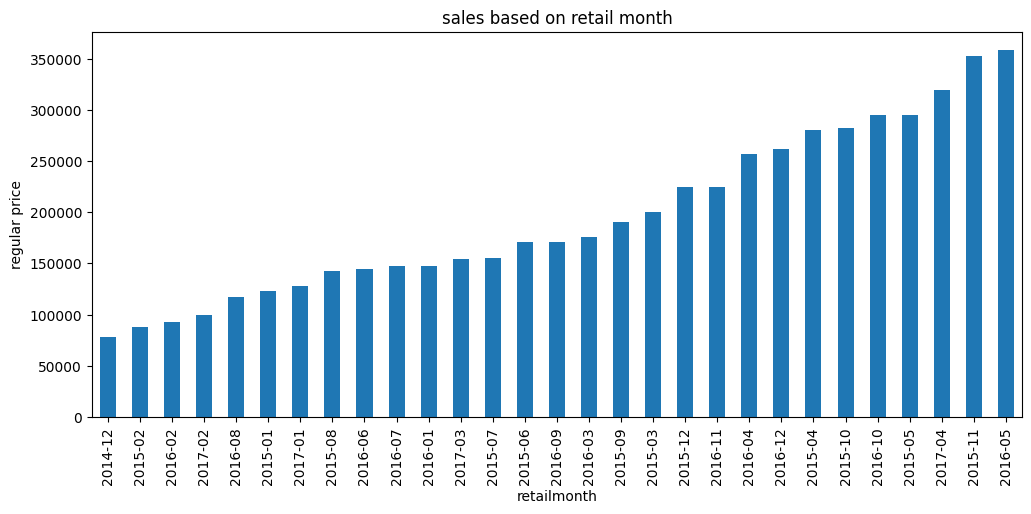

In [402]:
plot('retailmonth','sales','bar','sales based on retail month')

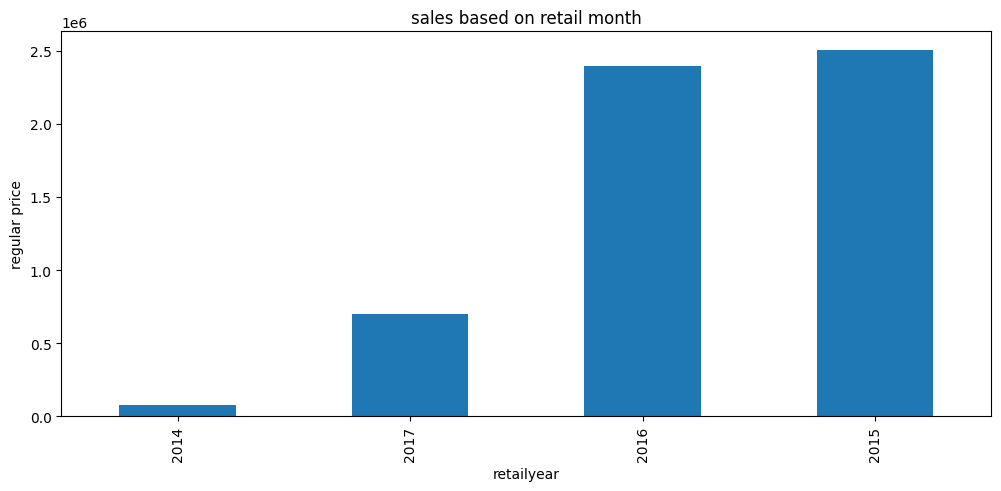

In [403]:
plot('retailyear','sales','bar','sales based on retail month')

#### insights:
##### 1-the highest purchase rate in May 2016 and November 2015
##### 2-the lowest purchase rate in December 2014 
##### 3- February has low purchase rate among all the presented years
##### 4- 2014 has the lowest purchase rate, 2017 comes after it.
##### 5- purchase rate at its peak in 2015
##### 6- purchase rate is slightly lower in 2016 than in 2015

<AxesSubplot: title={'center': 'sales in retail year based on countries'}, xlabel='retailyear,country'>

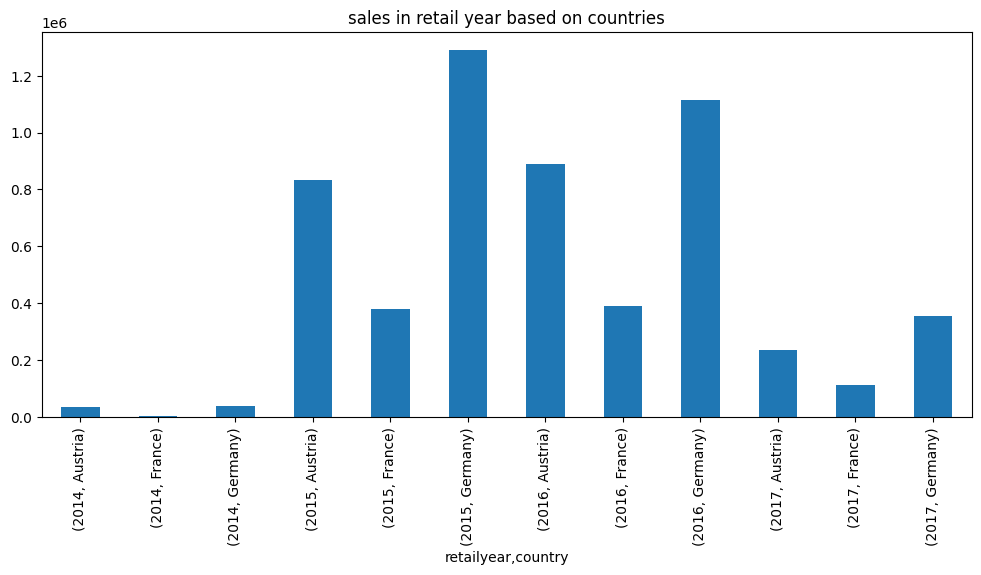

In [404]:
ax=plt.figure(figsize=(12,5))
plt.title('sales in retail year based on countries')
df.groupby(['retailyear','country'])['sales'].sum().plot(kind='bar')

#### insights:
##### 1-Germany highest purchase rate was in 2015.
##### 2-Austria highest purchase rate was in 2016.
##### 3-france highest purchase rate was in 2016 and amost the same in 2015.


## Promotions insights

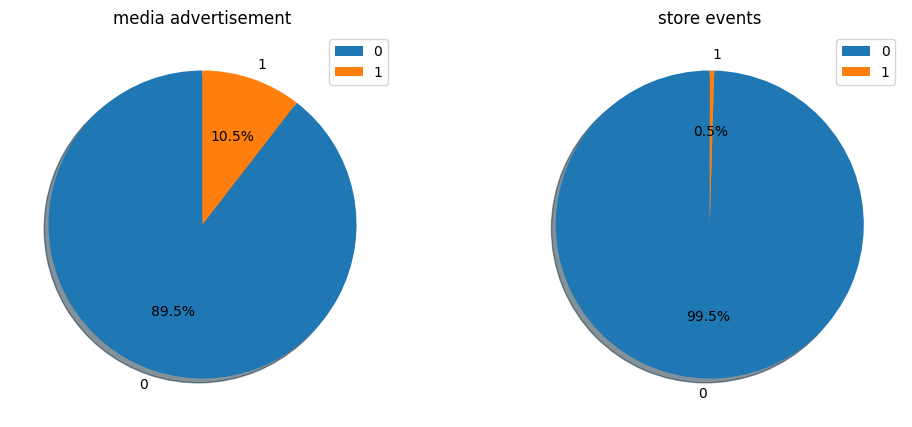

In [405]:
fig, ax = plt.subplots(2,1,figsize=(12,5))
plt.subplot(1,2,1)
plt.pie(df.groupby('promo1')['sales'].sum(),labels=df.groupby('promo1')['sales'].sum().index, autopct='%1.1f%%',
        shadow=True, startangle=90) 
plt.title('media advertisement')
plt.legend()
plt.subplot(1,2,2)
plt.pie(df.groupby('promo2')['sales'].sum(),labels=df.groupby('promo2')['sales'].sum().index, autopct='%1.1f%%',
        shadow=True, startangle=90) 
plt.title('store events')
plt.legend()

plt.show()

#### insights:
##### 1-sales during media advertisement is low with a percentage of 10.5%. 
##### 2-sales rate during store events is extremely low 0.5% .



# Data Preprocessing

In [406]:
#function to handle categorical columns
def handle_catg(df):
    cat_cols=df.select_dtypes(include=[object]).columns
    #convert column catagories to nums
    for col in cat_cols:
        df[col]=df[col].astype(str)
        col_vals=df[col].unique()
        
        i=0
        for label in col_vals:
            df[col].replace(label,i,inplace=True)
            i+=1
    return df

In [407]:
df=handle_catg(df)

In [408]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,category,cost,style,sizes,gender,label,main_color,sec_color,retailmonth,retailyear
0,0,0,28,5.95,3.95,0.663866,0,0,0,1003.0,...,0,13.29,0,0,0,0,0,0,0,0
1,0,0,28,5.95,3.95,0.663866,0,0,0,1003.0,...,0,2.29,1,0,0,0,1,0,0,0
2,0,0,28,5.95,3.95,0.663866,0,0,0,1003.0,...,1,1.70,1,0,0,0,2,0,0,0
3,0,0,28,5.95,3.95,0.663866,0,0,0,1003.0,...,2,9.00,1,0,1,0,3,1,0,0
4,0,0,28,5.95,3.95,0.663866,0,0,0,1003.0,...,3,9.60,1,0,0,0,4,1,0,0


# Correlation between all columns

<AxesSubplot: >

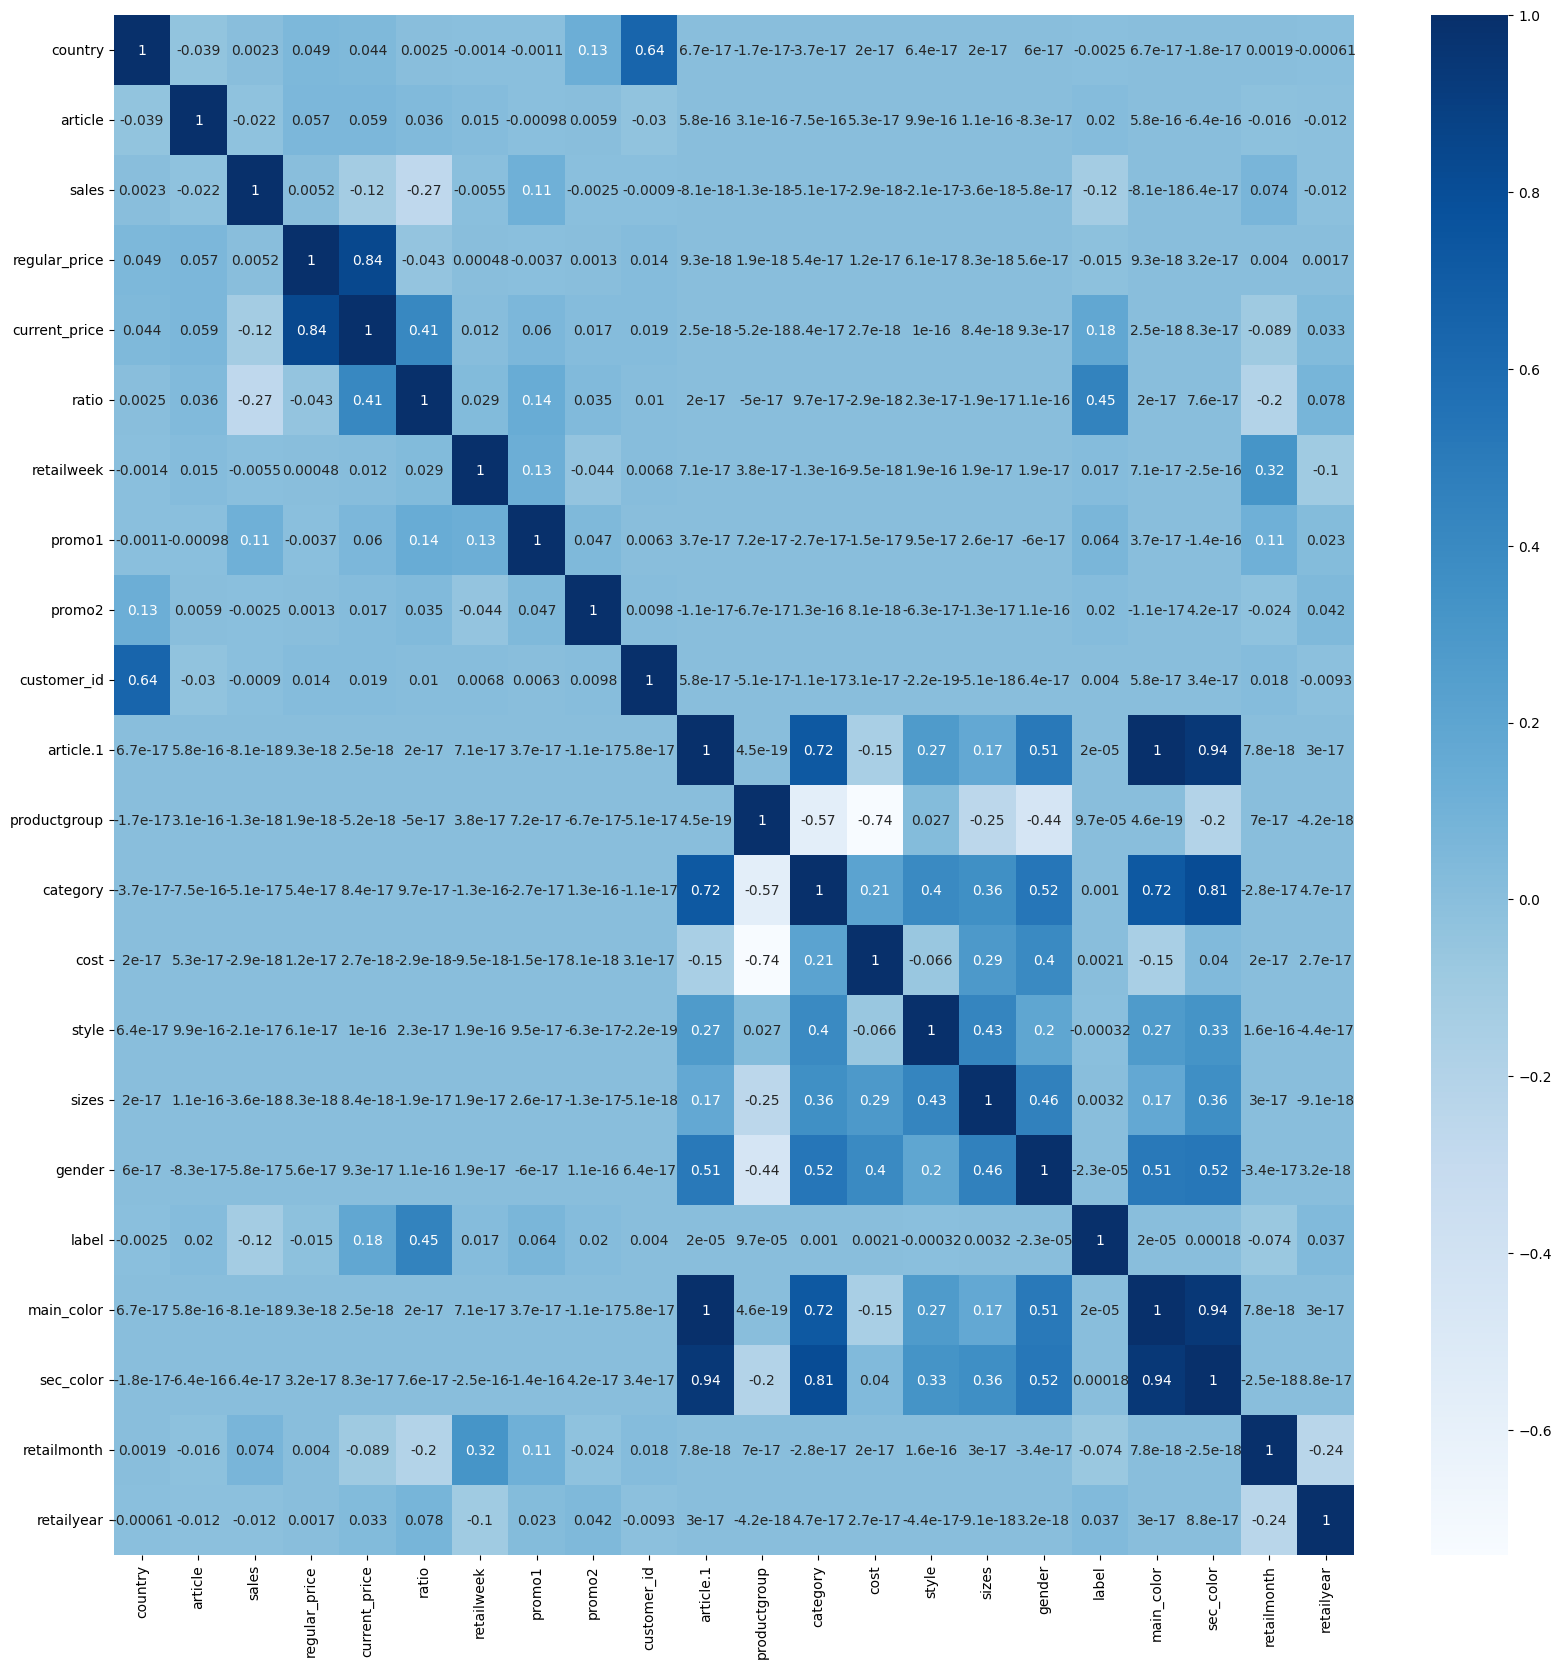

In [409]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

## Checking the Data Balance

<AxesSubplot: >

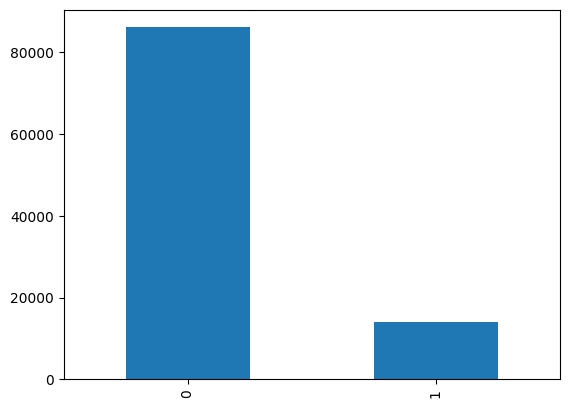

In [410]:
df['label'].value_counts().plot(kind='bar')

### insights:
#### Data is unbalanced
#### Class 0 is the majority class while Class 1 is the minority class

In [411]:
#data rebalancing
class_0_count,class_1_count=df['label'].value_counts()

class_0=df[df['label']==0]
class_1=df[df['label']==1]

In [412]:
#rebalance data by oversampling the minority class (class_1)
class_1_oversampled=class_1.sample(class_0_count,replace=True)
class_1_oversampled.shape

(86072, 22)

In [413]:
#concating the oversampled class with the other class
df_oversampled=pd.concat([class_0,class_1_oversampled],axis=0)
df_oversampled.shape

(172144, 22)

<AxesSubplot: >

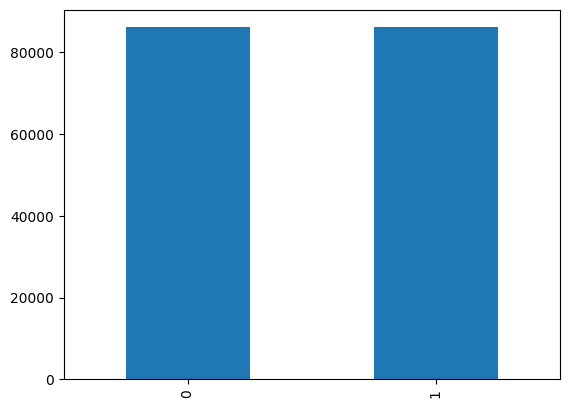

In [414]:
#visualize label count after oversampling
df_oversampled['label'].value_counts().plot(kind='bar')

# Feature Selection

In [415]:
# function for feature selection based on correlation with the target 

def corr_feature_selection(df,target_name,thresh):
    df_cor=pd.DataFrame(columns=['correlation with '+target_name])

    for col in df.columns:
        if col!=target_name:
            df_cor.loc[col]=abs(df[target_name].corr(df.loc[:,col]))

    df_cor.sort_values(by=['correlation with '+target_name],inplace=True,ascending=False)
    
    
    #feature selection based on correlation with target
    final_columns=[]
    for i in df_cor.index:
        if df_cor.loc[i,'correlation with '+target_name]>thresh:
            final_columns.append(i)
          
    final_columns.append(target_name)
    df=df.loc[:,final_columns]
    return df,df_cor

In [543]:
#feature selection based on correlation with target feature SalePrice

print("the shape of data before feature selection is: ",df_oversampled.shape)
df_final,df_corr=corr_feature_selection(df_oversampled,'label',0.001)
print("**************************************************************************")
print(df_corr)
print("**************************************************************************")
print(df_final.head())
print("**************************************************************************")
print("the shape of data after feature selection is: ",df_final.shape)

the shape of data before feature selection is:  (172144, 22)
**************************************************************************
               correlation with label
ratio                        0.633519
current_price                0.238569
sales                        0.191764
retailmonth                  0.099375
promo1                       0.087207
retailyear                   0.051641
article                      0.028489
promo2                       0.025007
retailweek                   0.023490
regular_price                0.020616
customer_id                  0.006579
country                      0.003895
sec_color                    0.002756
main_color                   0.001850
article.1                    0.001850
style                        0.001380
sizes                        0.001297
gender                       0.000906
cost                         0.000899
productgroup                 0.000674
category                     0.000179
****************************

In [560]:

y=df_final['label'].values
X=df_final.drop(columns=['label'],axis=1).values


# Data Splitting

In [561]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2,shuffle=True,stratify=y)

# Decision Tree Model

In [562]:
#required models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#Evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score



In [563]:
#function to train and evaluate models
def train_model(model_name,model,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    #train model on train data
    model.fit(X_train,y_train)
    
    #prediction over trian data
    y_train_pred = model.predict(X_train)
    
    #prediction over test data
    y_test_pred = model.predict(X_test)
    
    #train accuracy using accuracy score metric
    train_acc=round(accuracy_score(y_train,y_train_pred),2)*100
    print("training accuracy = ",train_acc)

    
    #test accuracy using accuracy score metric
    test_acc=round(accuracy_score(y_test,y_test_pred),2)*100
    print("testing accuracy = ",test_acc)
    
    #f1-score
    f1_s=round(f1_score(y_test, y_test_pred),2)*100
    print("f1-score = ",f1_s)

    #evaluate model using confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
    plt.show()
    print(classification_report(y_test,y_test_pred))
    

training accuracy =  100.0
testing accuracy =  93.0
f1-score =  94.0


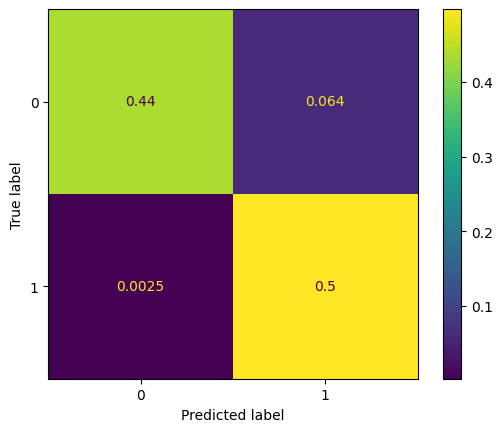

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     17215
           1       0.89      0.99      0.94     17214

    accuracy                           0.93     34429
   macro avg       0.94      0.93      0.93     34429
weighted avg       0.94      0.93      0.93     34429



In [564]:
DTC=DecisionTreeClassifier()
train_model('Decision Tree',DTC)